In [179]:
%pylab inline
from skimage import data, color, transform, morphology, exposure
from scipy.fftpack import dct, idct
from scipy.signal import gaussian, convolve2d
from numpy import unravel_index
import os

Populating the interactive namespace from numpy and matplotlib


# Transformata Fouriera w obrazach

Zobaczmy jak to działa na kilku przykładach. Wiadomo, że transformata Fouriera 1D dobrze rozpoznaje sygnał sinusoidalny (jako pojedyńcy punkt na spektrogramie). Zobaczmy czy tak samo będzie z tranformatą 2D. Wygnereuj taki sygnał i narysuj jego widmo amplitudowe i fazowe:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot x/W+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

Możesz najpierw założyć jednostkową amplitudę i zerową fazę oraz $f$ ustawić na 100, a póżniej zobaczyć co się stanie jak zmienisz parametry. Załóż że W i H są 512 pikseli. Zaleca się użycia polecenia *numpy.meshgrid* do wygenerowania wartości współrzędnych X i Y z powyższego wzoru (najlepiej jako liczby rzeczywiste).

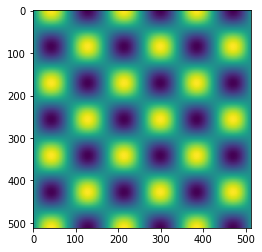

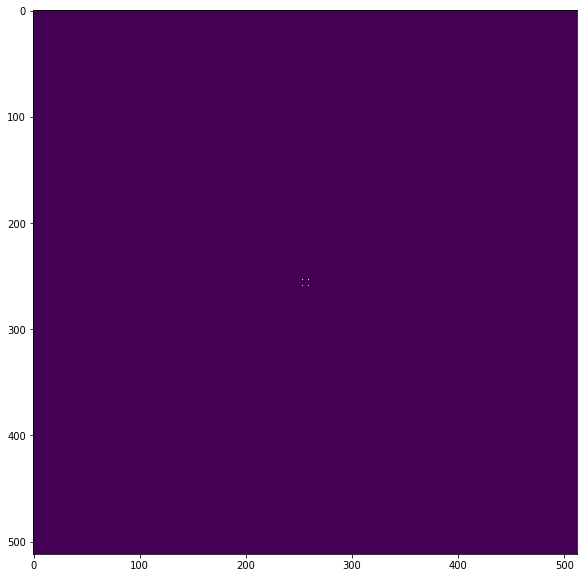

In [2]:
W = H = 512
x, y = meshgrid(arange(W), arange(H))
A = 1
f = 3
ph = 0
I = A*sin(2*pi*f*x/W + ph) * A*cos(2*pi*f*y/W + ph)

H = fft.fft2(I)
H = fft.fftshift(H)

imshow(I)
figure(figsize=(10, 10))
imshow(abs(H))

A teraz zrób to samo ale dla $y$ zamiast $x$:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot y/H+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

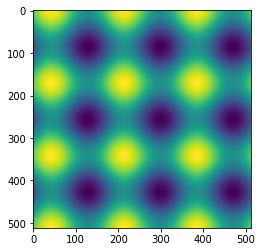

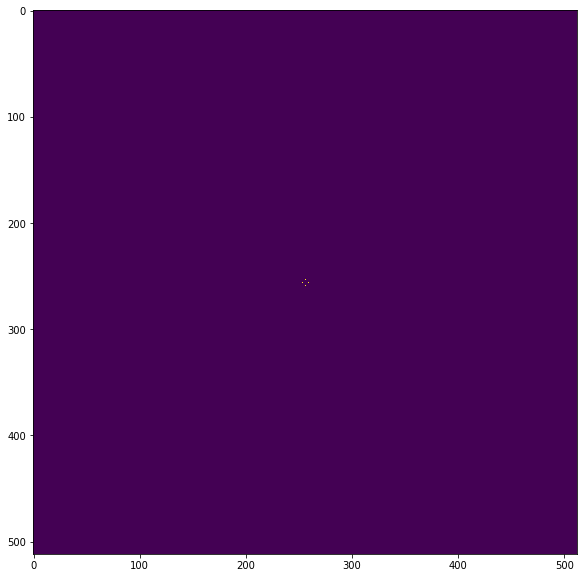

In [3]:
W = H = 512
x, y = meshgrid(arange(W), arange(H))
A = 1
f = 3
ph = 0
I = A*sin(2*pi*f*x/W + ph) + A*cos(2*pi*f*y/W + ph)

H = fft.fft2(I)
H = fft.fftshift(H)

imshow(I)
figure(figsize=(10, 10))
imshow(abs(H))

Teraz zrób to samo dla sumy $x$ i $y$:

\begin{equation}
I_{x,y}=A\cdot \sin(2\cdot\pi\cdot f\frac{x/W+y/H}{2}+\phi)\hspace{1cm}\text{, dla }x\in[0,W]\text{ i }y\in[0,H]
\end{equation}

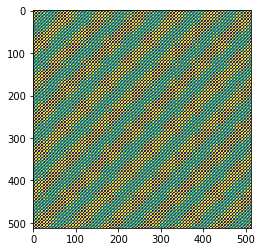

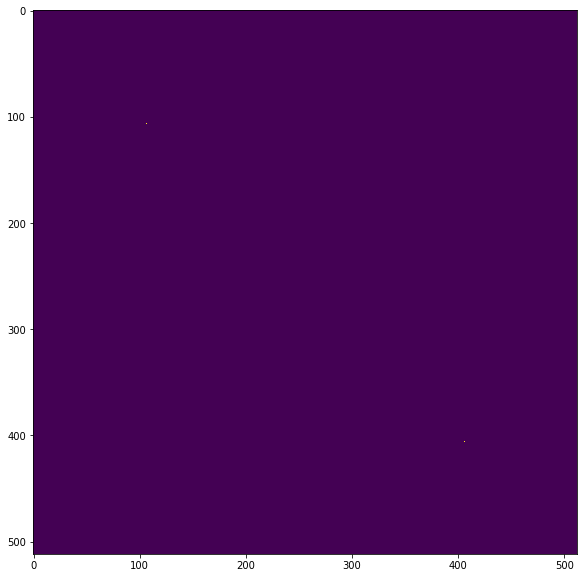

In [4]:
W = H = 512.0
x, y = meshgrid(arange(W), arange(H))
A = 1
f = 300
ph = 0
I = A*sin(2*pi*f*((x/W + y/H)/2) + ph)

H = fft.fft2(I)
H = fft.fftshift(H)

imshow(I)
figure(figsize=(10, 10))
imshow(abs(H))

Spróbuj zdefniować obszar wartości widma 2D i określić co w nim oznaczają poszczególne punkty. Jaka występuje symetria?

Zrób przykładowe widmo jakiegoś obrazu i dokonaj odwrotnej transformaty Fouriera.

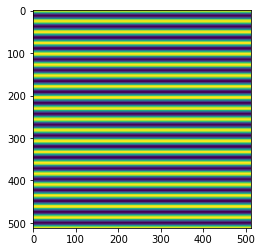

In [5]:
H = zeros((512, 512))

H[256 + 20, 256] = 1e10
# H[256 + 27, 256 + 10] = 1e10

H = fft.fftshift(H)
I = fft.ifft2(H)
I = real(I)

imshow(I)

Wczytaj przykładowy obraz natuarlny i narysuj jego widmo. Zauważ, że taki obraz może mieć dosyć duże przesunięcie DC, więc jego składowa widma $(0,0)$ będzie bardzo wysoka. Najlepiej obejrzeć widmo w skali logarytmicznej.

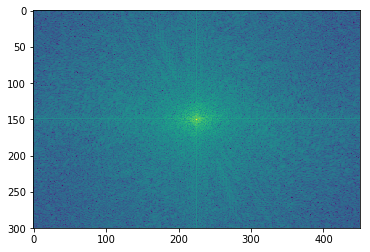

In [6]:
i = data.chelsea()
i = color.rgb2gray(i)

I = fft.fft2(i)
I = fft.fftshift(I)

imshow(log(abs(I)))

Dokonaj zmian w widmie maskując jego poszczególne części: najpierw górne, potem dolne częstotliwości i narysuj co z tego wyjdzie.

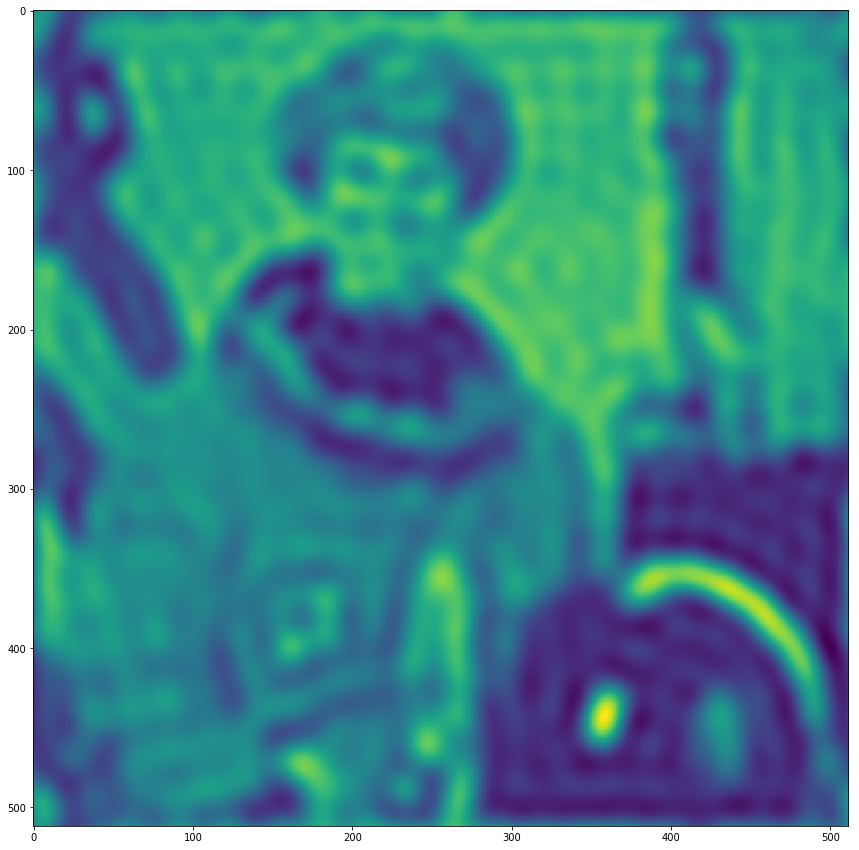

In [7]:
i = data.astronaut()
i = color.rgb2gray(i)

I = fft.fft2(i)
I = fft.fftshift(I)

L = 20

d = morphology.disk(L)
m = zeros(I.shape)
M = int(I.shape[0]/2)
N = int(I.shape[1]/2)

m[M-L : M+L+1,  N-L : N+L+1] = d

I = I*(m)
I = fft.fftshift(I)
i = fft.ifft2(I)
i = real(i)

figure(figsize=(15,15))
imshow(i)

# Dyskretrna transformata kosinusowa

Narysuj wynik DCT na przykładowym obrazie naturalnym. Ponieważ *numpy* nie ma implementacji DCT, do jej policzenia użyj metody *scipy.fftpack.dct*. Metoda ta niestety liczy tylko 1D wersję transformaty, ale możemty zastosować pewną zależność transfotmaty żeby otrzymać poprawną wersję 2D:

  * policz DCT z obrazu
  * dokonaj transpozycji wyniku
  * policz DCT z powyższej transpozycji
  * dokonaj jeszcze jednej transpozycji wyniku

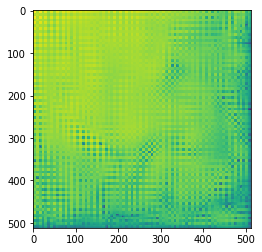

In [8]:
i = data.chelsea()
i = color.rgb2gray(i)


I = dct(I)
I = I.T
I = dct(I)
I = I.T

# I = fft.fft2(i)
# I = fft.fftshift(I)

imshow(log(abs(I)))

Użyj DCT do dokonania tych samych operacji filtrowania w dziedzinie częstotliwości, jak w przypadku FFT w ćwiczeniach powyżej. Uważaj żeby dokonać poprawnej procedury odwracania liczenia DCT2.

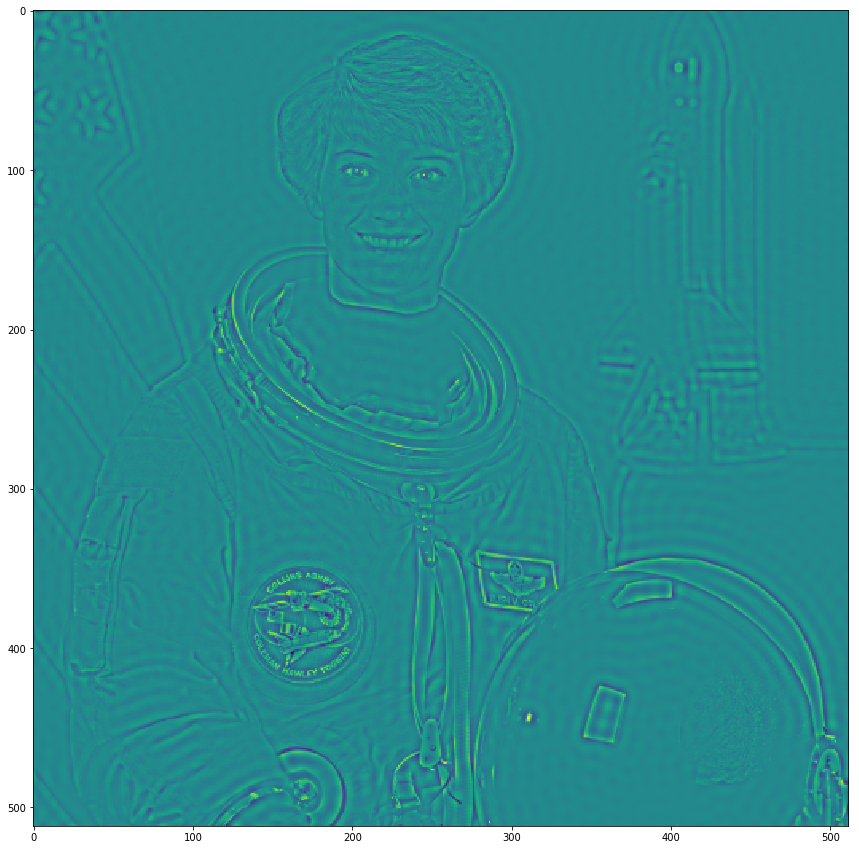

In [9]:
i = data.astronaut()
i = color.rgb2gray(i)

I = dct(i)
I = I.T
I = dct(I)
I = I.T

L = 100
d = morphology.disk(L)
m = zeros(I.shape)
M = int(I.shape[0]/2)
N = int(I.shape[1]/2)

m[: L+1,  : L+1] = d[L:,L:]

I = I*(1-m)
I = I.T
I = idct(I)
I = I.T
I = idct(I)

figure(figsize=(15,15))
imshow(I)

# Splot w obrazie

Splot w obrazach 2D jest podobny do sygnałów akustycznych 1D. Metodę tą można s powodzeniem stosować do filtrowania obrazu i wszystkie inne reguły (np. dotyczące dziedziny częstotliwości) mają takie same odzwericiedlenie jak w sygnałach 1D.

Zacznijmy więc od najprostszego filtru: uśredniającego. Filtry do splotu 2D mają 2 wymiary (wysokość i szerokość). Zrób fitr uśredniający 10x10 i dokonaj splotu z wybranym obrazem (metoda *scipy.signal.convolve2d*).

Jaka jest charakterystyka tego filtru? Co on robi?

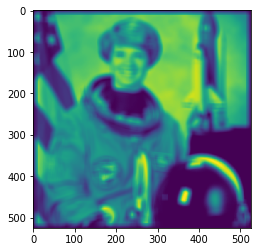

In [10]:
N = 14

k = ones((N, N))

k /= k.sum()

i = data.astronaut()
i = color.rgb2gray(i)

I = convolve2d(i, k)

imshow(I)

Zamiast filtru uśredniającego, zastosuj filtr *Gaussowski*. Jaką on ma charakterystykę? Dlaczeo jest lepszy od uśredniającego?

Żeby zrobić Gaussowski filtr 2D, trzeba:
* zrobić filtr 1D o długości N
* zmienić go na macierz 2D (1xN)
* dokonać mnożenia tej macierzy przez jej transponowaną wersję

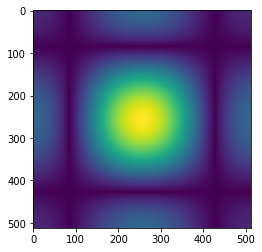

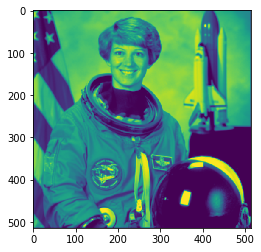

In [11]:
N = 3
S = 10
k = gaussian(N, S)
k = expand_dims(k, 0)
k = k*k.T
k /= k.sum()

l = zeros((512, 512))
l[:k.shape[0],:k.shape[1]] = k
K = fft.fft2(l)
K =fft.fftshift(K)
imshow(abs(K))
figure()

i = data.astronaut()
i = color.rgb2gray(i)

I = convolve2d(i, k)

imshow(I)

Zrób filtr używając następujących wartości:

| | | |
|-|-|-|
| -1 | -1 | -1 |
| -1 | 8 | -1 |
| -1 | -1 | -1 |

Co robi ten filtr?

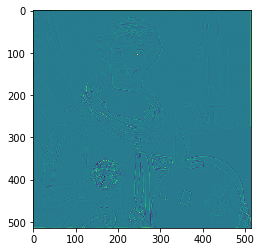

In [12]:
k = ones((3,3))
k = -k
k[1,1] = 8

i = data.astronaut()
i = color.rgb2gray(i)

I = convolve2d(i, k)

imshow(I)

Łatwo można policzyć filtr który liczy pochodną z obrazu w poziomie albo pionie. Jak?

Zrób filtr Sobela-Feldmana zdefiniowanego w ten sposób:

| | | |
|-|-|-|
| -1 | -2 | -1 |
| 0 | 0 | 0 |
| 1 | 2 | 1 |

Oraz jego transponowaną wersję (odpowiadającą pochodnej według innej osi).

Narysuj obydwie pochodne obrazu, a potem ich moc i kąt używając tych samych wzorów jak w przypadku liczenia widma.

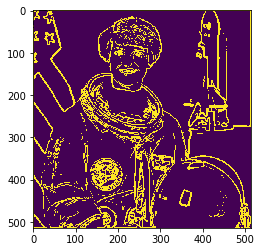

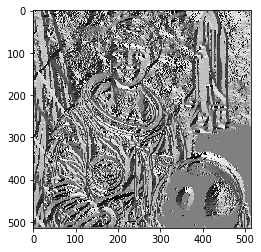

In [13]:
k = array([[-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])

i = data.astronaut()
i = color.rgb2gray(i)

I = convolve2d(i, k)

It = convolve2d(i, k.T)

Ik = sqrt(I**2 + It**2)
Ik = Ik > 0.5

imshow(Ik)

Ia = arctan2(It, I)

figure()
imshow(Ia, cmap=cm.gray)

In [15]:
style.use("dark_background")

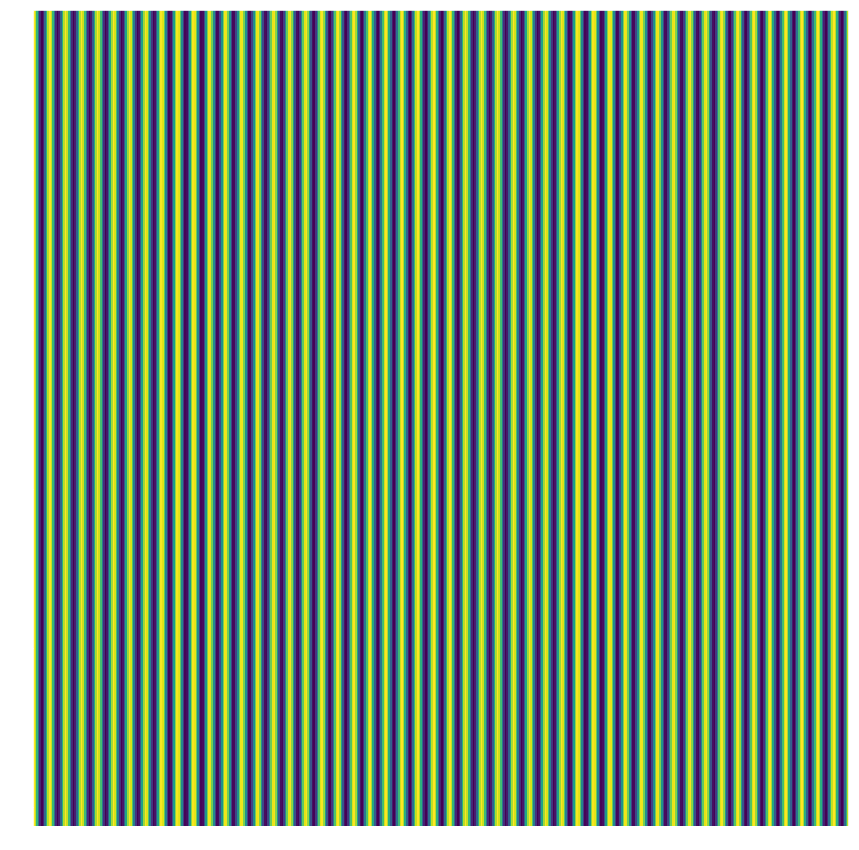

In [87]:
W = 512
H = 512
I = zeros((H, W))
I[int(0), int(0.1*W)] = 1

i = fft.ifft2(I)
i = i.real

figure(figsize=(15, 15))
imshow(i)

# Praca domowa

## 1. Filtrowanie w dziedzinie częstotliwości

Wczytaj obraz *noisecam.png*.

Jest to klatka ze szkolnego systemu monitoringu. Ze względu na oszczędności w instalacji użyto nieekranowanych kabli UTP do przesyłania zarówno sygnału jak i zasilania poszczególnych kamer (wskazówka!). Zrób filtrowanie w dziedzinie częstotliwości żeby usunąć szum na obrazie.

(419, 509)


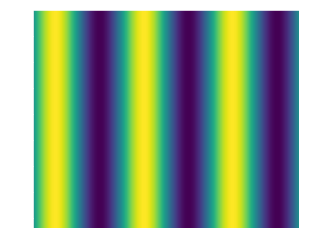

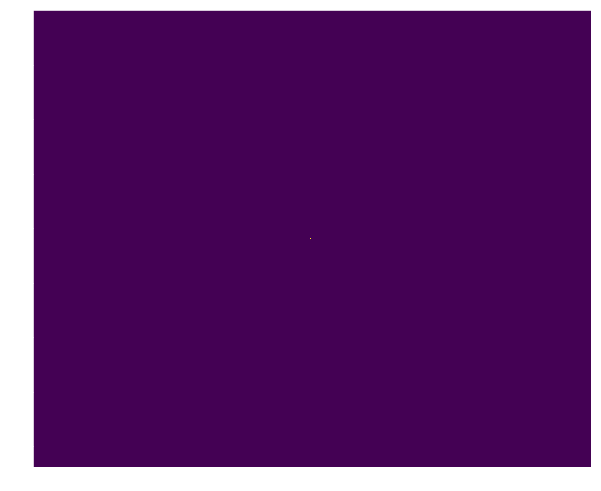

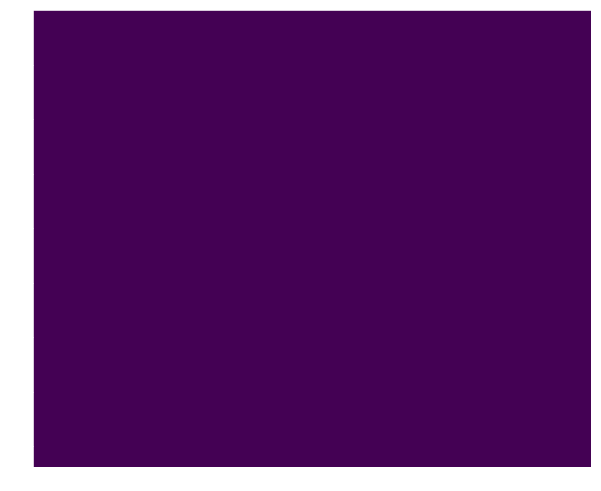

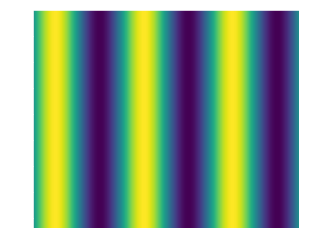

In [170]:
W = 1024
He = 838
x, y = meshgrid(arange(W), arange(He))
A = 1
f = 3
ph = 0
I = A*sin(2*pi*f*x/W + ph)
imshow(I)

H = fft.fft2(I)
H = fft.fftshift(H)
figure(figsize=(10, 10))
imshow(abs(H))

print(unravel_index(H.argmax(), H.shape))

# H[:, :] = 0
H[int(He/2), 509] = 1
figure(figsize=(10, 10))
imshow(abs(H))

H = fft.fftshift(H)
I = fft.ifft2(H)
I = I.real
figure()
imshow(I)

(838, 1024)


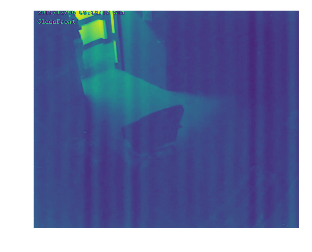

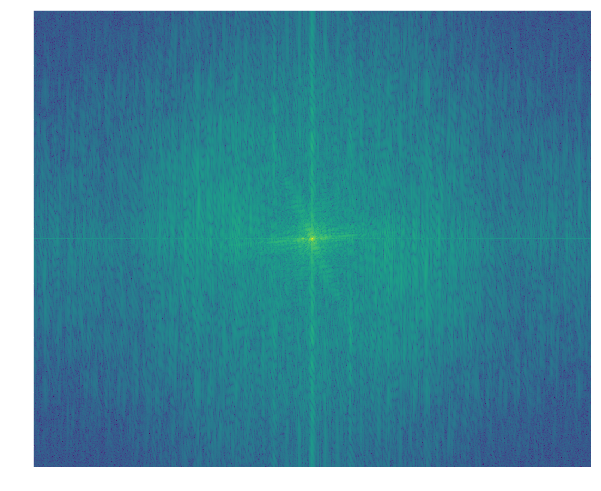

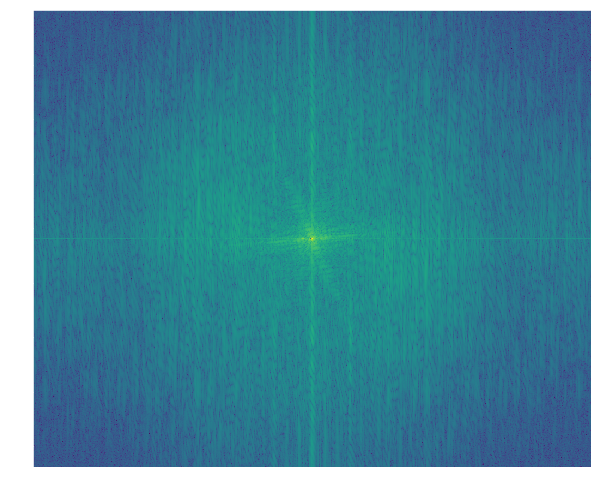

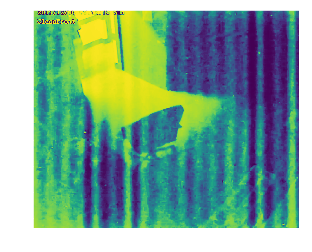

In [182]:
i = data.load(os.getcwd() + "/noisecam.png")
i = color.rgb2gray(i)

print(i.shape)
imshow(i)

H = fft.fft2(i)
H = fft.fftshift(H)
figure(figsize=(10, 10))
imshow(log(abs(H)))

H[int(He/2), 509] = 1
figure(figsize=(10, 10))
imshow(log(abs(H)))

H = fft.fftshift(H)
I = fft.ifft2(H)
I = I.real
I = exposure.equalize_hist(I)
figure()
imshow(I)

## 2. Wyrównanie tekstu

Ktoś źle zeskanował ten tekst i obraz *text.png* jest bardzo przechylony:

Użyj analizy częstotliwości obrazu żeby znaleźć kąt przechylenia obrazu. Jeśli chcesz, użyj metody *skimage.transform.rotate* żeby skorygować zdjęcie używając policzonych wartości.

[  2.96306208e+01   2.96306208e+01   5.68519953e+01 ...,   2.39130264e+06
   2.39130264e+06   6.13026960e+07]


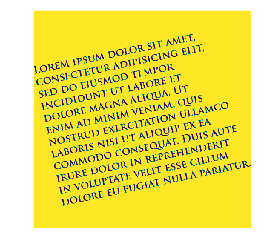

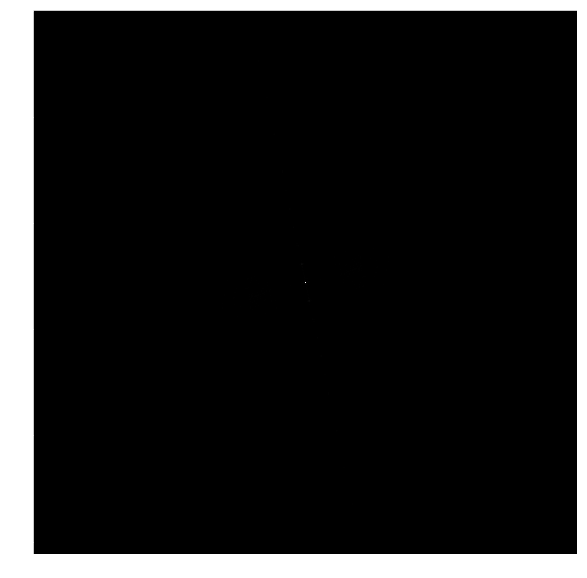

In [215]:
i = data.load(os.getcwd() + "/text.png")
i = color.rgb2gray(i)

imshow(i)

H = fft.fft2(i)
H = fft.fftshift(H)
figure(figsize=(10, 10))
imshow((abs(H)), cmap=cm.gray)

H = abs(H)
H = H.flatten()
print(sort(H, axis=-1))

## 3. Analiza obrazu

Wczytaj obraz *brickwall.jpg*.

Użyj analizy częstotliwości żeby oszacować ilość cegieł na zdjęciu. Znajdź na widmie punkty odpowiadające wierszom i kolumnom na zdjęciu. Pokaż jak te punkty odpowiadają ilości cegieł. Pomnoż te wartości żeby podać szacunkową ilość cegieł.

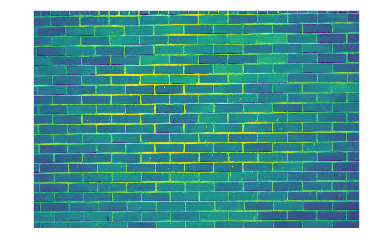

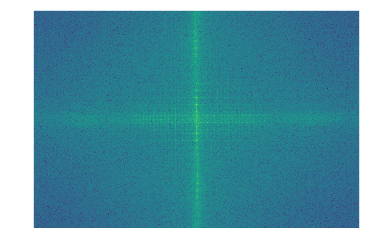

In [217]:
i = data.load(os.getcwd() + "/brickwall.jpg")
i = color.rgb2gray(i)

imshow(i)

H = fft.fft2(i)
H = fft.fftshift(H)
figure()
imshow(log(abs(H)))